# MidTerm Summary

## Bag of Words

In [48]:
sentences = """
Regularly and thoroughly clean your hands with an alcohol-based hand rub or wash them with soap and water.
This eliminates germs including viruses that may be on your hands.
Avoid touching your eyes, nose and mouth.
Hands touch many surfaces and can pick up viruses.
Once contaminated, hands can transfer the virus to your eyes, nose or mouth.
From there, the virus can enter your body and infect you.
Cover your mouth and nose with your bent elbow or tissue when you cough or sneeze.
Then dispose of the used tissue immediately into a closed bin and wash your hands.
By following good ‘respiratory hygiene’, you protect the people around you from viruses, which cause colds, flu and COVID-19.
Clean and disinfect surfaces frequently especially those which are regularly touched,
such as door handles, faucets and phone screens or mouth.
From there, the virus can enter your body and infect you.
"""
# Count the words and find the most common words (after removing stopwords, ',?.') and put it in a dataframe

In [49]:
import nltk.tokenize
import pandas as pd

tokenized_sentences = nltk.sent_tokenize(sentences)
from sklearn.feature_extraction.text import CountVectorizer

In [50]:
vectorizer = CountVectorizer(stop_words='english')
vectorized_sentences = vectorizer.fit(tokenized_sentences)
#print(vectorized_sentences.vocabulary_) #-----------------!!!!!!!!!!!!!---------------------------

In [51]:
transformed = vectorizer.fit_transform(tokenized_sentences)
df_count_vectorized = pd.DataFrame(data=transformed.toarray(), columns=vectorizer.get_feature_names_out())
df_count_vectorized

,19,alcohol,avoid,based,bent,bin,body,cause,clean,closed,...,tissue,touch,touched,touching,transfer,used,virus,viruses,wash,water
0,0,1,0,1,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,1,1
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,0,0,1,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,1,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,1,0,0,0
5,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,1,0,0,0
6,0,0,0,0,1,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
7,0,0,0,0,0,1,0,0,0,1,...,1,0,0,0,0,1,0,0,1,0
8,1,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
9,0,0,0,0,0,0,0,0,1,0,...,0,0,1,0,0,0,0,0,0,0


## TF_IDF

In [52]:
# calculate the tf-idfs and put them in a dataframe where one column is the words and the next column is the tf_idfs for each word.

from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(stop_words='english')
vectorized_sentences = vectorizer.fit_transform(tokenized_sentences)
matrix = pd.DataFrame(data=vectorized_sentences.toarray(), columns=vectorizer.get_feature_names_out())
print(matrix)

          19   alcohol     avoid     based      bent       bin      body  \
0   0.000000  0.323429  0.000000  0.323429  0.000000  0.000000  0.000000   
1   0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
2   0.000000  0.000000  0.516605  0.000000  0.000000  0.000000  0.000000   
3   0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
4   0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
5   0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.514793   
6   0.000000  0.000000  0.000000  0.000000  0.384986  0.000000  0.000000   
7   0.000000  0.000000  0.000000  0.000000  0.000000  0.382666  0.000000   
8   0.294053  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
9   0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
10  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.514793   

       cause     clean    closed  ...    tissue     touch   touched  touching  \
0   0.

In [53]:
pd.DataFrame({
    'tf_idf': matrix.sum(axis=0)
})

,tf_idf
19,0.294053
alcohol,0.323429
avoid,0.516605
based,0.323429
bent,0.384986
bin,0.382666
body,1.029585
cause,0.294053
clean,0.526957
closed,0.382666


## Sentiment Analysis

In [54]:
# encoding: just test which one works: utf-8, utf-16, euc-kr, cp949, latin_1
imdb = pd.read_csv('../week7/imdb_dataset.csv', nrows=10000, encoding='cp949')

In [55]:
# PREPROCESSING
print(imdb)

                                                 review sentiment
0     One of the other reviewers has mentioned that ...  positive
1     A wonderful little production. <br /><br />The...  positive
2     I thought this was a wonderful way to spend ti...  positive
3     Basically there's a family where a little boy ...  negative
4     Petter Mattei's "Love in the Time of Money" is...  positive
...                                                 ...       ...
9995  Fun, entertaining movie about WWII German spy ...  positive
9996  Give me a break. How can anyone say that this ...  negative
9997  This movie is a bad movie. But after watching ...  negative
9998  This is a movie that was probably made to ente...  negative
9999  Smashing film about film-making. Shows the int...  positive

[10000 rows x 2 columns]


In [56]:
from textblob import TextBlob

reviews = pd.DataFrame(data=imdb, columns=["review", "sentiment"])
reviews["polarity"] = reviews["review"].apply(lambda review: TextBlob(review).polarity)
print(reviews)

                                                 review sentiment  polarity
0     One of the other reviewers has mentioned that ...  positive  0.023433
1     A wonderful little production. <br /><br />The...  positive  0.109722
2     I thought this was a wonderful way to spend ti...  positive  0.354008
3     Basically there's a family where a little boy ...  negative -0.057813
4     Petter Mattei's "Love in the Time of Money" is...  positive  0.217952
...                                                 ...       ...       ...
9995  Fun, entertaining movie about WWII German spy ...  positive  0.249811
9996  Give me a break. How can anyone say that this ...  negative  0.066324
9997  This movie is a bad movie. But after watching ...  negative  0.021673
9998  This is a movie that was probably made to ente...  negative -0.020000
9999  Smashing film about film-making. Shows the int...  positive  0.120536

[10000 rows x 3 columns]


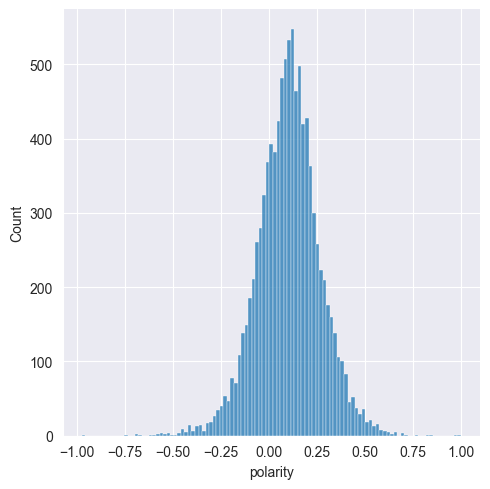

In [57]:
import seaborn as sns
%matplotlib inline
sns.displot(reviews['polarity'])

##  Nice to Know

In [68]:
a = [x for x in range(1,11)]
print(a)

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
